#### 소규모 데이터셋
- 보통 적은 샘플이란 수백개에서 수만개 사이를 의미
- 실용적인 예제로 4000개의 강아지와 고양이 사진(2000개는 강아지, 2000개는 고양이)으로 구성된 데이터셋에서 강아지와 고양이 이미지를 분류 (적은 샘플)
    - 훈련을 위해 2000개의 사진을 사용하고 검증과 테스트에 각각 1000개의 사진을 사용

**보유한 소규모 데이터셋을 사용해 처음부터 새로운 모델을 훈련하는 예제**
- 진행 방법
    1. 2,000개의 훈련 샘플에서 작은 컨브넷을 어떤 규제 방법도 사용하지 않고 훈련하여 기준이 되는 기본 성능을 만듬(이 방법은 71%의 분류 정확도를 달성)
        - 이 방법의 주요 이슈는 과대적합(데이터가 작음으로인해)
            - 컴퓨터 비전을 이용해 과대적합을 줄이기 위한 강력한 방법인 데이터 증식을 진행
                - 데이터 증식을 통해 네트워크의 성능은 82% 정확도로 향상

    2. 작은 데이터셋에 딥러닝을 적용하기 위한 핵심적인 기술 두 가지 적용
        - 사전 훈련된 네트워크로 특성을 추출하는 것(90%에서 96%의 정확도)
        - 사전 훈련된 네트워크를 세밀하게 튜닝(최종 모델은 97% 정확도)

- 아래 세 가지 전략은
    - 처음부터 작은 모델을 훈련하기
    - 사전 훈련된 모델을 사용해 특성 추출하기
    - 사전 훈련된 모델을 세밀하게 튜닝하기
    - 작은 데이터셋에서 이미지 분류 문제를 수행할 때 포함되어야 함


#### 데이터 내려받기
- 2013년 후반에 캐글에서 컴퓨터 비전 경연 대회의 일환으로 생성된 데이터 셋
- 원본 데이터셋 : `https://www.kaggle.com/c/dogs-vs-cats/data`

- 이 사진들은 중간 정도의 해상도를 가진 컬러 JPEG 파일임

(https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)


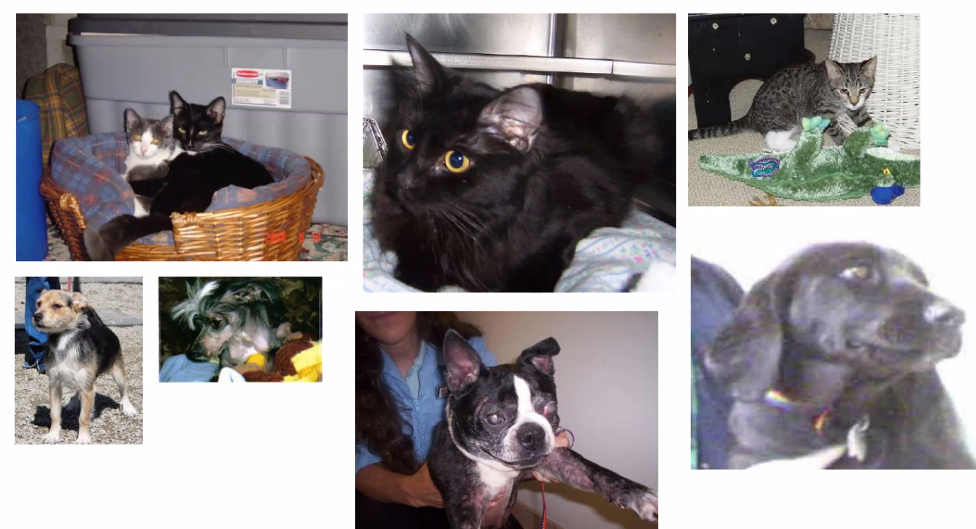

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import os, shutil

In [3]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './data/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './data/cats_and_dogs_small'


# if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
#     shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
# os.mkdir(base_dir)


### 디렉터리 설정

In [4]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
# './data/cats_and_dogs_small' 해당 경로 밑에 train 디렉터리 생성

In [5]:
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [6]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [7]:
# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [8]:
# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

### 고양이 이미지 복사 과정

In [9]:
# # 처음 1000개의 고양이 이미지를 train_cats_dir에 복사
# fnames=['cat.{}.jpg'.format(i) for i in range(1000)]

# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src,dst)

In [10]:
# # 다음 500개의 고양이 이미지를 validationcats_cats_dir에 복사
# fnames=['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src,dst)

In [11]:
# # 다음 500개의 고양이 이미지를 test_cats_dir에 복사
# fnames=['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src,dst)

In [12]:
# os.path.join(original_dataset_dir, 'cat.0.jpg')

In [13]:
# os.path.join(train_cats_dir, 'cat.0.jpg')

### 강아지 이미지 복사 과정

In [14]:
# # 처음 1000개의 강아지 이미지를 train_cats_dir에 복사
# fnames=['dog.{}.jpg'.format(i) for i in range(1000)]

# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src,dst)

In [15]:
# # 다음 500개의 강아지 이미지를 validationcats_cats_dir에 복사
# fnames=['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src,dst)

In [16]:
# # 다음 500개의 강아지 이미지를 test_cats_dir에 복사
# fnames=['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src,dst)

### 이미지 갯수 확인

In [17]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500


In [18]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 강아지 이미지 전체 개수: 500
검증용 고양이 이미지 전체 개수: 500


In [19]:
print('학습용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('학습용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

학습용 강아지 이미지 전체 개수: 1000
학습용 고양이 이미지 전체 개수: 1000


### 이미지 전처리
- 데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 함
- 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 거침

1.	사진 파일을 읽기
2.	JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
3.	그다음 부동 소수 타입의 텐서로 변환
4.	픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호하기 때문).

- 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있음
- 케라스의 `keras.preprocessing.image`:  이미지 처리를 위한 헬퍼 도구

- `ImageDataGenerator` 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어줌

In [20]:
print(validation_dir)
print(train_dir)

./data/cats_and_dogs_small\validation
./data/cats_and_dogs_small\train


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 제너레이터 객체 생성 - 모든 이미지의 스켈링을 조정하도록 파라미터 설정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 제너레이터 객체가 갖고 있는 메서드인 flow_from_directory 이용
# 이미지를 불러올 때 폴더명에 맞춰서 자동으로 labelling을 진행
# 이미지의 사이즈도 변환하는 작업을 진행해줌

train_generator = train_datagen.flow_from_directory(
                # 타깃 디렉터 경로
                train_dir,
                # 이미지를 150*150 크기로 바꿈
                target_size=(150,150),
                batch_size=20,
                class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
## 결과 확인
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print(data_batch[15])
    print(labels_batch[15])
    print('배치 레이블 크기:', labels_batch.shape)
    break


배치 데이터 크기: (20, 150, 150, 3)
[[[0.04705883 0.04705883 0.04705883]
  [0.04705883 0.04705883 0.04705883]
  [0.04705883 0.04705883 0.04705883]
  ...
  [0.04705883 0.04705883 0.04705883]
  [0.0627451  0.0627451  0.0627451 ]
  [0.0627451  0.0627451  0.0627451 ]]

 [[0.04705883 0.04705883 0.04705883]
  [0.04705883 0.04705883 0.04705883]
  [0.04705883 0.04705883 0.04705883]
  ...
  [0.05490196 0.03921569 0.04313726]
  [0.06666667 0.0509804  0.05490196]
  [0.0627451  0.0627451  0.0627451 ]]

 [[0.04705883 0.04705883 0.04705883]
  [0.04705883 0.04705883 0.04705883]
  [0.04705883 0.04705883 0.04705883]
  ...
  [0.08627451 0.04313726 0.05882353]
  [0.09019608 0.04705883 0.0627451 ]
  [0.0627451  0.0627451  0.0627451 ]]

 ...

 [[0.10196079 0.13333334 0.09019608]
  [0.14117648 0.15294118 0.11764707]
  [0.18039216 0.18039216 0.14901961]
  ...
  [0.2784314  0.23137257 0.24705884]
  [0.2509804  0.24313727 0.24705884]
  [0.26666668 0.23529413 0.227451  ]]

 [[0.16470589 0.14117648 0.14901961]
  [0.176

### 네트워크 구성하기
- Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 생성 
- 이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만들 것 임 
- Conv2D + MaxPooling2D 단계를 하나 더 추가


In [23]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # 필터수는 32-64-128 / 필터 크기 3*3

# input_shpae(150,150,3) : 이미지 크기가 전부 150으로 맞춰줌
model.add(layers.MaxPooling2D((2, 2))) #축소는 50%
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#### generator를 사용한 데이터로 모델 훈련
- fit_generator(generator, steps_per_epoch=100, epochs=30, 
                validation_data=generator, validation_steps=50)

In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 21s 204ms/step - loss: 0.6922 - acc: 0.5290 - val_loss: 0.6745 - val_acc: 0.5790
Epoch 2/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6673 - acc: 0.5850 - val_loss: 0.6470 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6173 - acc: 0.6640 - val_loss: 0.6108 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5762 - acc: 0.7015 - val_loss: 0.6779 - val_acc: 0.6110
Epoch 5/30
100/100 [==============================] - 20s 195ms/step - loss: 0.5467 - acc: 0.7215 - val_loss: 0.5768 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 20s 196ms/step - loss: 0.5199 - acc: 0.7410 - val_loss: 0.5901 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 20s 199ms/step - loss: 0.4905 - acc: 0.7565 - val_loss: 0.5721 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 2

#### 훈련 종류 후 모델 저장 (습관적으로 저장해야함 - 한번 훈련시 시간이 많이 소요됨)

In [26]:
model.save('cats_and_dogs_small_1.hdf5')

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

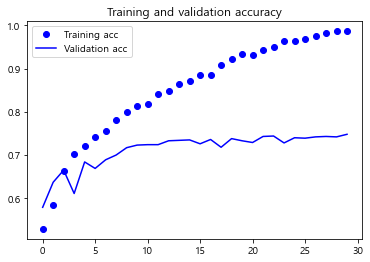

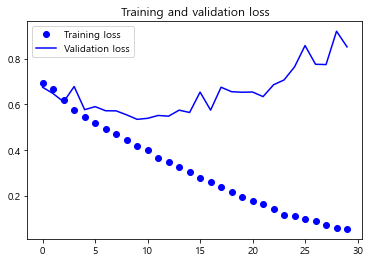

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### 결과
- 그래프는 과대적합의 특성을 보여줌
- 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달 함
- 반면 검증 정확도는 70-72%에서 멈추었음
- 검증 손실은 다섯번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았고 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소함
- 비교적 훈련 샘플이 2000개로 적기 때문에  과대적합이 가장 중요한 문제
    - 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들이 있지만
    - 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 이용


## 데이터 증식 사용하기
- 과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생 
- 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을것 임
- 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법임
- 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘리고
    - **훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것**이 목표
        - 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것임

- 케라스에서는 `ImageDataGenerator`가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하여 데이터 증식을 가능하게 함


In [28]:
datagen = ImageDataGenerator(rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
* `shear_range`는 랜덤하게 전단 변환을 적용할 각도 범위
* `zoom_range`는 랜덤하게 사진을 확대할 범위
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집는다 수평 대칭을 가정할 수 있을 때 사용(예를 들어, 풍경/인물 사진).
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략임

In [29]:
# 이미지 전처리 유틸리티 모듈
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]
img_path

'./data/cats_and_dogs_small\\train\\cats\\cat.100.jpg'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

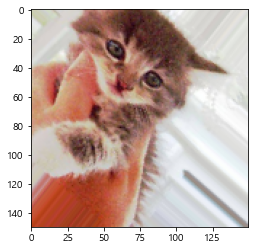

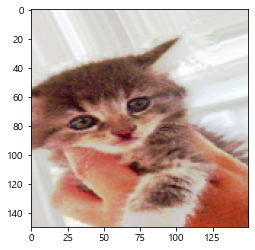

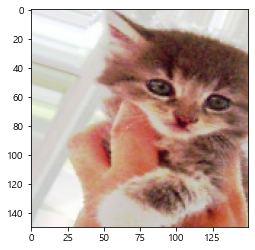

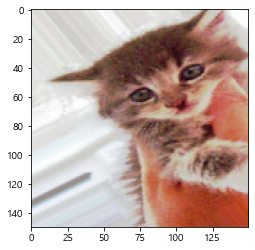

In [30]:
# 이미지를 잃고 크기 변경
img = image.load_img(img_path, target_size=(150,150))

# 넘파이 배열로 변환
x = image.img_to_array(img)

# 크기 변환(1,150,150,3)
x = x.reshape((1,) + x.shape)

# flow() 메서드 : 랜덤하게 변환된 이미지의 배치를 생성
# 무한 반복되기 때문에 너는 지점에서 중지해야 함

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i=i+1
    if i%4==0:
        break
plt.show()

- 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않는다
- 하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큼
    - 즉, 새로운 정보를 만들어낼 수 없고 단지 기존 정보의 재조합만 가능한 상태
        - 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있으므로 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 `Dropout` 층을 추가함


In [38]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


**데이터 증식과 드롭아웃을 사용하여 이 네트워크를 훈련**

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되면 안됨
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
train_dir

'./data/cats_and_dogs_small\\train'

In [41]:
validation_dir

'./data/cats_and_dogs_small\\validation'

In [42]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//32, #생략하거나 왼쪽 식을 사용
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//32) #생략하거나 왼쪽 식을 사용

Epoch 1/100
62/62 [==============================] - 23s 356ms/step - loss: 0.6944 - acc: 0.5102 - val_loss: 0.6872 - val_acc: 0.5605
Epoch 2/100
62/62 [==============================] - 22s 347ms/step - loss: 0.6902 - acc: 0.5300 - val_loss: 0.6806 - val_acc: 0.6099
Epoch 3/100
62/62 [==============================] - 21s 338ms/step - loss: 0.6853 - acc: 0.5462 - val_loss: 0.6748 - val_acc: 0.5252
Epoch 4/100
62/62 [==============================] - 21s 343ms/step - loss: 0.6720 - acc: 0.5752 - val_loss: 0.6548 - val_acc: 0.5988
Epoch 5/100
62/62 [==============================] - 21s 338ms/step - loss: 0.6557 - acc: 0.5971 - val_loss: 0.6282 - val_acc: 0.6321
Epoch 6/100
62/62 [==============================] - 20s 326ms/step - loss: 0.6457 - acc: 0.6148 - val_loss: 0.6116 - val_acc: 0.6452
Epoch 7/100
62/62 [==============================] - 20s 326ms/step - loss: 0.6383 - acc: 0.6184 - val_loss: 0.6126 - val_acc: 0.6502
Epoch 8/100
62/62 [==============================] - 20s 327ms

Epoch 62/100
62/62 [==============================] - 20s 324ms/step - loss: 0.4698 - acc: 0.7866 - val_loss: 0.5002 - val_acc: 0.7631
Epoch 63/100
62/62 [==============================] - 20s 325ms/step - loss: 0.4745 - acc: 0.7749 - val_loss: 0.4507 - val_acc: 0.7833
Epoch 64/100
62/62 [==============================] - 20s 326ms/step - loss: 0.4611 - acc: 0.7846 - val_loss: 0.5169 - val_acc: 0.7450
Epoch 65/100
62/62 [==============================] - 20s 329ms/step - loss: 0.4669 - acc: 0.7851 - val_loss: 0.5184 - val_acc: 0.7490
Epoch 66/100
62/62 [==============================] - 20s 329ms/step - loss: 0.4636 - acc: 0.7764 - val_loss: 0.4540 - val_acc: 0.7863
Epoch 67/100
62/62 [==============================] - 21s 330ms/step - loss: 0.4566 - acc: 0.7830 - val_loss: 0.4379 - val_acc: 0.7964
Epoch 68/100
62/62 [==============================] - 21s 333ms/step - loss: 0.4589 - acc: 0.7871 - val_loss: 0.4600 - val_acc: 0.7913
Epoch 69/100
62/62 [==============================] - 2

In [43]:
model.save('cats_and_dogs_small_2.h5')

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

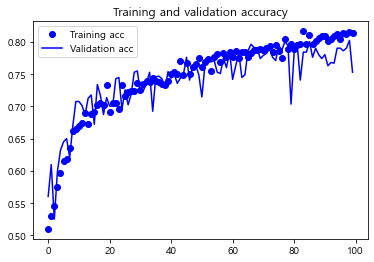

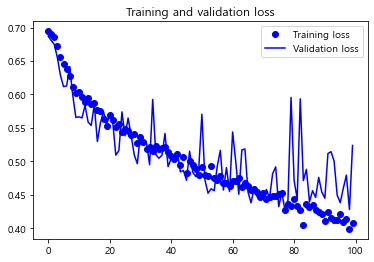

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
